In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM4 import SCM4

  0%|          | 0/2 [00:00<?, ?it/s]

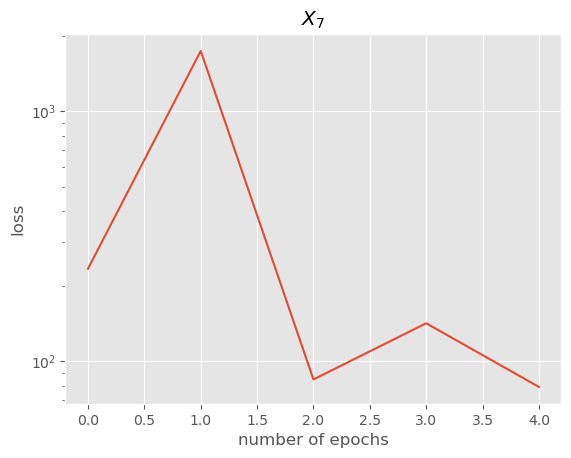

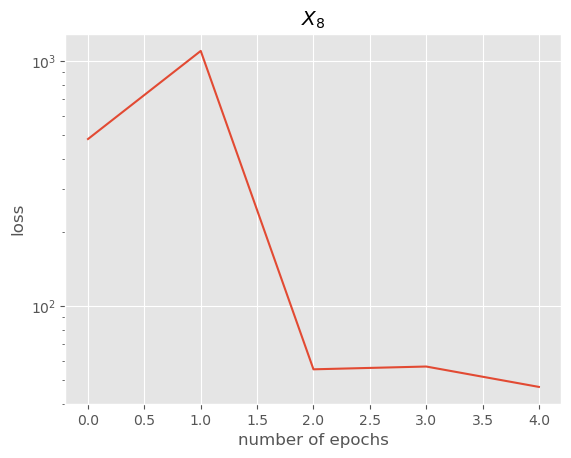

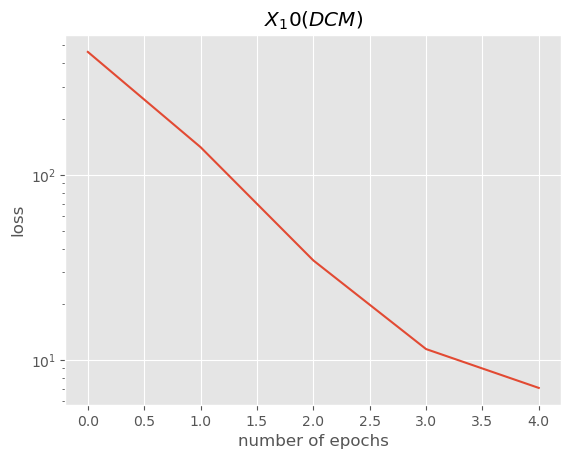

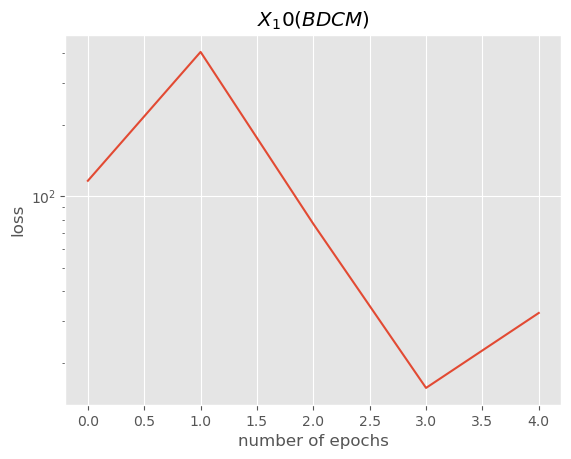

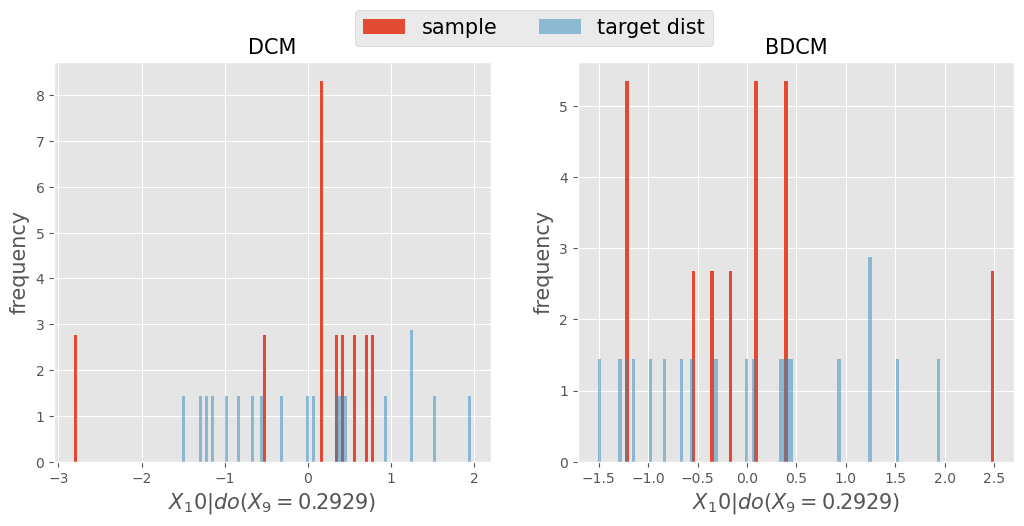

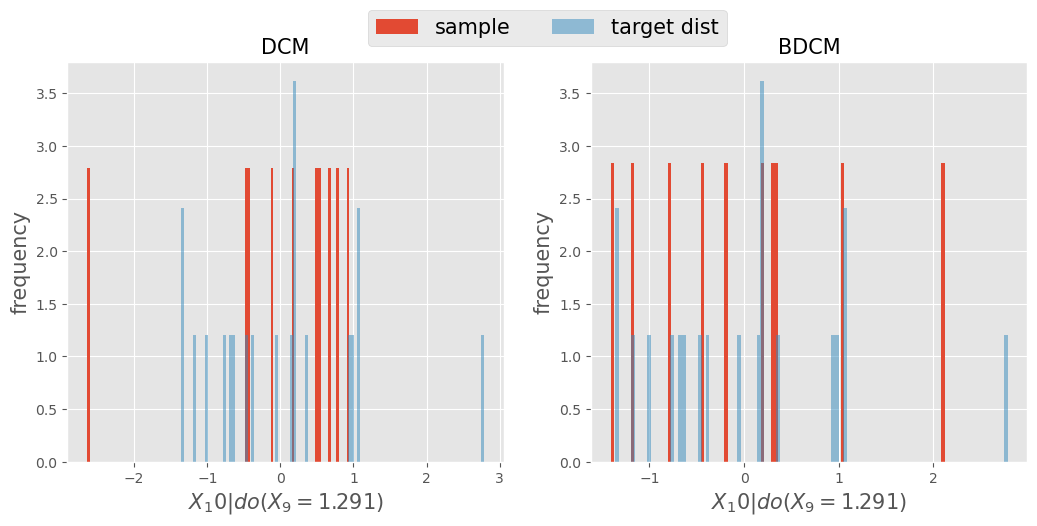

 50%|█████     | 1/2 [00:01<00:01,  1.85s/it]

mean of MMD for DCM: 0.0507
standard deviation of MMD for DCM: 0.00571
mean of MMD for BDCM: 0.0335
standard deviation of MMD for BDCM: 0.00178


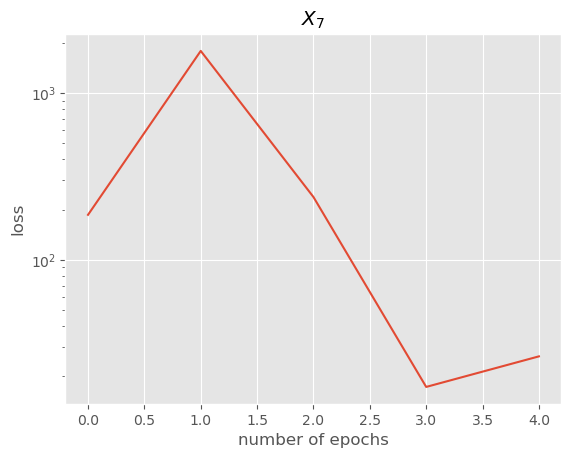

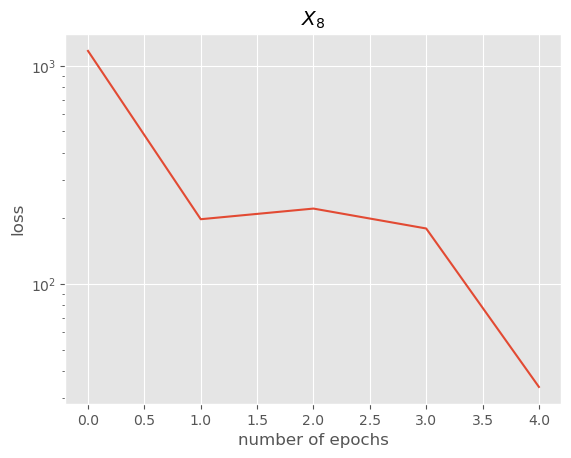

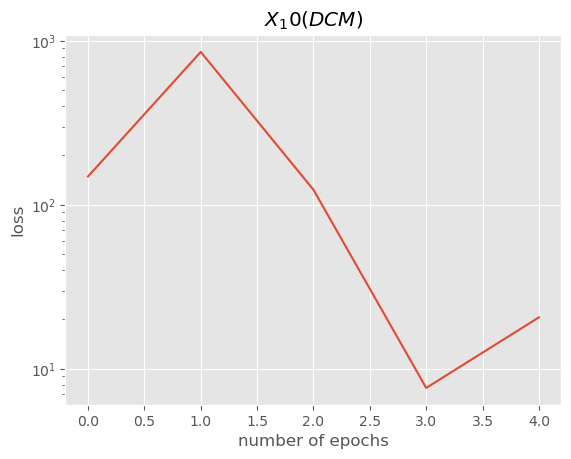

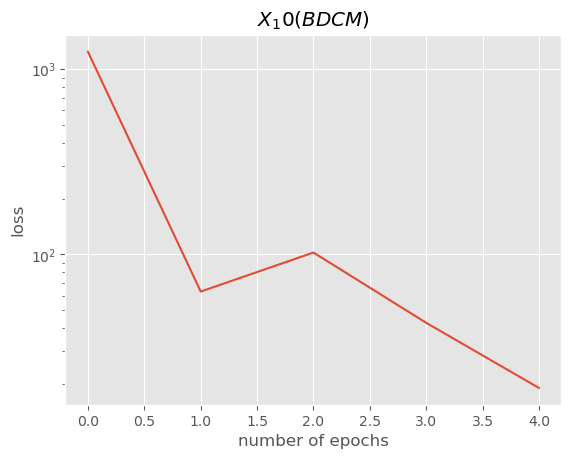

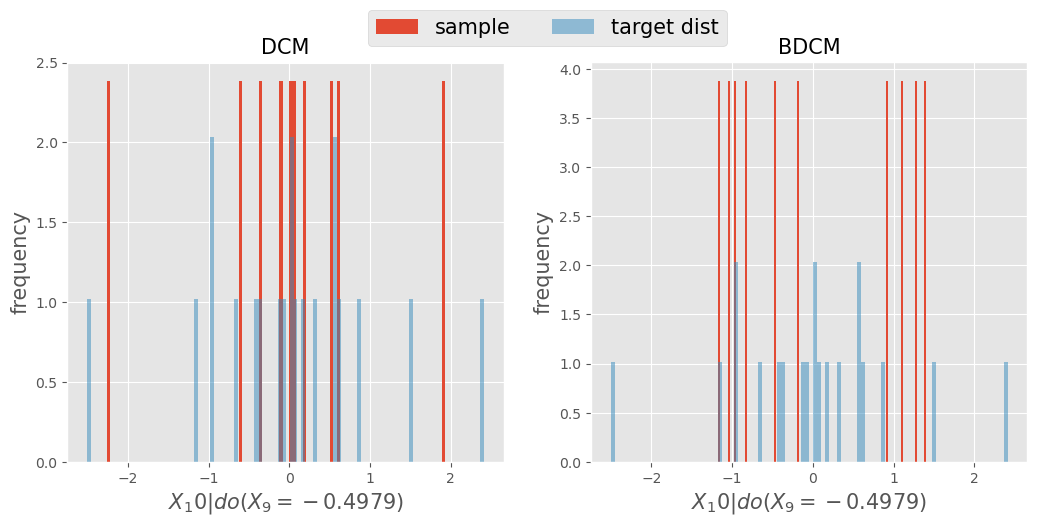

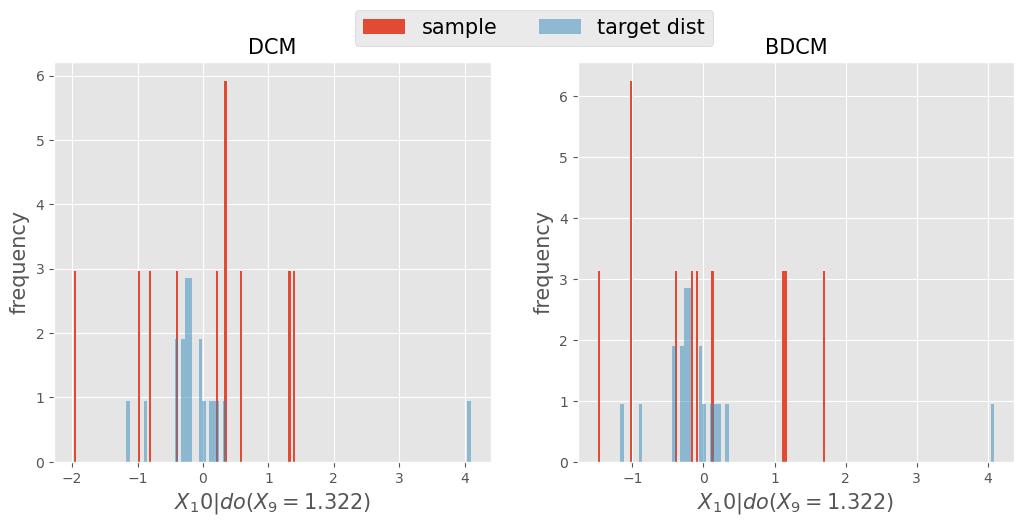

100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

mean of MMD for DCM: 0.0165
standard deviation of MMD for DCM: 0.00393
mean of MMD for BDCM: 0.0151
standard deviation of MMD for BDCM: 0.00339
mean of all MMD for DCM: 0.0336
standard deviation of all MMD for DCM: 0.0178
mean of all MMD for BDCM: 0.0243
standard deviation of all MMD for BDCM: 0.00961


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = u
  elif ind == 2:
    output = x[0] + u
  elif ind == 3:
    output = -x[1] ** 3 + x[1] + u
  elif ind == 4:
    output = x[2] ** 2 + 0.1 + u
  elif ind == 5:
    output = x[3] ** 2 + x[3] + u
  elif ind == 6:
    output = -x[2] ** 2 + x[2] + u
  elif ind == 7:
    output = 3 * x[3] + 0.1 + u 
  elif ind == 8:
    output = x[4] * x[7] + x[4] + x[7] + u
  elif ind == 9:
    output = x[5] * x[6] * x[8] + x[5] * x[6] + u
  return normalize(output)

SCM4(structural_eq=structural_eq, simple_or_complex = "simple")